In [2]:
import scipy.signal as signal
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
temp=loadtxt('temp_satlantic.dat')
N=len(temp)
freq=1./float(N)
print freq

0.000242836328315


In [29]:
# First, design the Buterworth filter
N  = 3    # Filter order
#Wn = 0.01 # Cutoff frequency
Wn=100.*freq
B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
tempf = signal.filtfilt(B,A, temp)
print A,B

[ 1.         -2.84745825  2.70632987 -0.85845963] [  5.14982728e-05   1.54494818e-04   1.54494818e-04   5.14982728e-05]


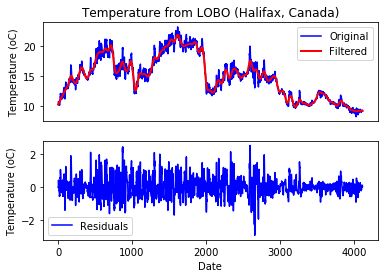

In [28]:
# Make plots
fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.plot(temp, 'b-')
plt.plot(tempf, 'r-',linewidth=2)
plt.ylabel("Temperature (oC)")
plt.legend(['Original','Filtered'])
plt.title("Temperature from LOBO (Halifax, Canada)")
ax1.axes.get_xaxis().set_visible(False)
 
ax1 = fig.add_subplot(212)
plt.plot(temp-tempf, 'b-')
plt.ylabel("Temperature (oC)")
plt.xlabel("Date")
plt.legend(['Residuals'])